In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [282]:
#importing the datasets
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
print(df_train.head())
print('* '*50)
print(df_test.head())


  session_id       startTime         endTime  \
0     u16159  15/12/14 18:11  15/12/14 18:12   
1     u10253  16/12/14 14:35  16/12/14 14:41   
2     u19037  01/12/14 15:58  01/12/14 15:58   
3     u14556   23/11/14 2:57   23/11/14 3:00   
4     u24295  17/12/14 16:44  17/12/14 16:46   

                                         ProductList  gender  
0  A00002/B00003/C00006/D28435/;A00002/B00003/C00...  female  
1  A00001/B00009/C00031/D29404/;A00001/B00009/C00...    male  
2                       A00002/B00001/C00020/D16944/  female  
3  A00002/B00004/C00018/D10284/;A00002/B00004/C00...  female  
4  A00001/B00001/C00012/D30805/;A00001/B00001/C00...    male  
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
  session_id       startTime         endTime  \
0     u12112  08/12/14 13:36  08/12/14 13:36   
1     u19725  19/12/14 13:52  19/12/14 13:52   
2     u11795  01/12/14 10:44  01/12/14 10:44   
3     u22639  08/12/14 20:19  08/12/14 2

In [283]:
print("Train data \nfeatures : \t{}\nThe inputs : \t{}".format(df_train.shape[1], df_train.shape[0])); print("\n")
print("Test data \nfeatures : \t{}\nThe inputs : \t{}".format(df_test.shape[1], df_test.shape[0]))

Train data 
features : 	5
The inputs : 	10500


Test data 
features : 	4
The inputs : 	4500


##EDA

In [0]:
# To show the all columns
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows", 2000)

In [285]:
print(df_train.head())
print('* '*50)
print(df_test.head())

  session_id       startTime         endTime  \
0     u16159  15/12/14 18:11  15/12/14 18:12   
1     u10253  16/12/14 14:35  16/12/14 14:41   
2     u19037  01/12/14 15:58  01/12/14 15:58   
3     u14556   23/11/14 2:57   23/11/14 3:00   
4     u24295  17/12/14 16:44  17/12/14 16:46   

                                         ProductList  gender  
0  A00002/B00003/C00006/D28435/;A00002/B00003/C00...  female  
1  A00001/B00009/C00031/D29404/;A00001/B00009/C00...    male  
2                       A00002/B00001/C00020/D16944/  female  
3  A00002/B00004/C00018/D10284/;A00002/B00004/C00...  female  
4  A00001/B00001/C00012/D30805/;A00001/B00001/C00...    male  
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
  session_id       startTime         endTime  \
0     u12112  08/12/14 13:36  08/12/14 13:36   
1     u19725  19/12/14 13:52  19/12/14 13:52   
2     u11795  01/12/14 10:44  01/12/14 10:44   
3     u22639  08/12/14 20:19  08/12/14 2

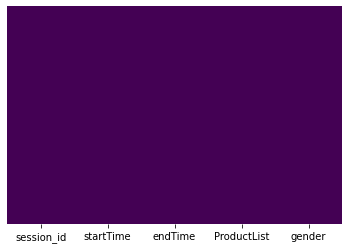

In [286]:
#how many missing value availble in the dataset we can see using heatmap
sns.heatmap(df_train.isnull(), yticklabels = False, cbar = False, cmap='viridis')

**Looks like there no missing value present in the Train dataset.

In [287]:
final_df = df_train.append(df_test) #merging the train and test dataset into one 
final_df.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


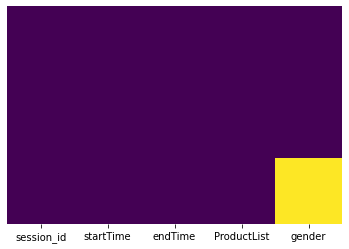

In [288]:
#how many missing value availble in the dataset we can see using heatmap
sns.heatmap(final_df.isnull(), yticklabels = False, cbar = False, cmap='viridis')

The test_train final_df shows there are some missing values in gender col.

In [289]:
final_df.isnull().sum()

session_id        0
startTime         0
endTime           0
ProductList       0
gender         4500
dtype: int64

In [290]:
final_df.head()

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male


In [0]:
final_df['product_']  = final_df['ProductList'].apply(lambda x : x.count(';')+1) #counting the values taking the productlist attribute

In [292]:
final_df['product_'].unique() #unique numeric values

array([ 4,  7,  1,  3,  2,  6, 14,  5,  9, 11, 10, 27, 19,  8, 13, 15, 12,
       24, 29, 17, 25, 16, 36, 18, 20, 30, 21, 22, 35, 43, 23, 31, 28])

In [0]:
new = final_df['ProductList'].str.split(";", expand = True)
new.fillna(value=0, inplace = True) #filling na values

In [294]:
#spliting the product list
new_ = new[0].str.split("/", expand = True)
new_.head()

,0,1,2,3,4
0,A00002,B00003,C00006,D28435,
1,A00001,B00009,C00031,D29404,
2,A00002,B00001,C00020,D16944,
3,A00002,B00004,C00018,D10284,
4,A00001,B00001,C00012,D30805,


In [0]:
new_.drop(labels = 4, axis = 1, inplace = True)

In [296]:
#rename rest 4 columns to 0: "s0", 1:"s1",2:"s2", 3:"s3" resp.
new_ = new_.rename(columns={0: "s0", 1:"s1",2:"s2", 3:"s3"})
new_.head()

,s0,s1,s2,s3
0,A00002,B00003,C00006,D28435
1,A00001,B00009,C00031,D29404
2,A00002,B00001,C00020,D16944
3,A00002,B00004,C00018,D10284
4,A00001,B00001,C00012,D30805


In [297]:
#concatinating the both dataset final and new_
final_df = pd.concat([final_df, new_], axis=1)
#final_df
final_df.head()

,session_id,startTime,endTime,ProductList,gender,product_,s0,s1,s2,s3
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,4,A00002,B00003,C00006,D28435
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,7,A00001,B00009,C00031,D29404
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female,1,A00002,B00001,C00020,D16944
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,3,A00002,B00004,C00018,D10284
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,2,A00001,B00001,C00012,D30805


In [298]:
#taking reference from stackoverflow
d_parser = lambda x : pd.datetime.strptime(x,"%d/%m/%y %H:%M")
#applying d_parser to endtime as wll as starttime
final_df['startTime'] = final_df['startTime'].apply(d_parser)
final_df['endTime'] = final_df['endTime'].apply(d_parser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [299]:
#time difference between the start time and end time
final_df['time difference'] = (pd.to_datetime(final_df['endTime']) - pd.to_datetime(final_df['startTime'])).dt.total_seconds()/60
final_df.tail()

,session_id,startTime,endTime,ProductList,gender,product_,s0,s1,s2,s3,time difference
4495,u23966,2014-12-15 21:11:00,2014-12-15 21:12:00,A00001/B00031/C00044/D03435/;A00001/B00031/C00...,NaN,3,A00001,B00031,C00044,D03435,1.0
4496,u20527,2014-12-02 07:53:00,2014-12-02 07:54:00,A00002/B00002/C00004/D17474/;A00002/B00002/C00...,NaN,2,A00002,B00002,C00004,D17474,1.0
4497,u13253,2014-11-15 21:38:00,2014-11-15 21:46:00,A00002/B00007/C00098/D03350/;A00002/B00007/C00...,NaN,9,A00002,B00007,C00098,D03350,8.0
4498,u17094,2014-12-17 08:51:00,2014-12-17 08:51:00,A00001/B00031/C00044/D09604/,NaN,1,A00001,B00031,C00044,D09604,0.0
4499,u24310,2014-12-17 17:25:00,2014-12-17 17:26:00,A00002/B00002/C00003/D20004/;A00002/B00002/C00...,NaN,2,A00002,B00002,C00003,D20004,1.0


In [300]:
final_df.drop(columns=['endTime','startTime','ProductList'],inplace=True)
final_df.head()

,session_id,gender,product_,s0,s1,s2,s3,time difference
0,u16159,female,4,A00002,B00003,C00006,D28435,1.0
1,u10253,male,7,A00001,B00009,C00031,D29404,6.0
2,u19037,female,1,A00002,B00001,C00020,D16944,0.0
3,u14556,female,3,A00002,B00004,C00018,D10284,3.0
4,u24295,male,2,A00001,B00001,C00012,D30805,2.0


In [301]:
from sklearn.preprocessing import LabelEncoder
#converting the labels into numeric form so as to convert it into the machine-readable form
le_en = LabelEncoder()
for a in ['s0','s1','s2','s3'] :
    final_df[a] = le_en.fit_transform(final_df[a])
final_df.head()

,session_id,gender,product_,s0,s1,s2,s3,time difference
0,u16159,female,4,1,2,5,9144,1.0
1,u10253,male,7,0,8,30,9422,6.0
2,u19037,female,1,1,0,19,5795,0.0
3,u14556,female,3,1,3,17,3668,3.0
4,u24295,male,2,0,0,11,9762,2.0


In [0]:
test_session = df_test['session_id']

In [0]:
df_train_1 = final_df[final_df['gender'].isnull()==False].copy()
df_test_1 = final_df[final_df['gender'].isnull()==True].copy()

In [0]:
df_train_1['gender']=df_train_1['gender'].apply(lambda x : 1 if x == 'male' else 0)
df_train_1.drop(columns='session_id',axis=1, inplace=True) #droping the session_id
df_test_1.drop(columns=['gender','session_id'],axis=1, inplace=True)

In [0]:
X = df_train_1.drop('gender',axis=1)
y = df_train_1['gender']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y, random_state = 40)


In [307]:
from sklearn.ensemble import RandomForestClassifier
ranf_clf = RandomForestClassifier()
ranf_clf.fit(X_train, y_train)
print('Training score = {}'.format(ranf_clf.score(X_train,y_train)))
print('Test score = {}'.format(ranf_clf.score(X_test,y_test)))

Training score = 0.9920398009950249
Test score = 0.8637806637806638


In [0]:
ranf_clf.fit(X, y)
test_prob = ranf_clf.predict_proba(df_test_1)[:,1]
df_ranf = pd.DataFrame({'session_id':test_session,'gender':test_prob})

In [0]:
df_ranf['gender'] = df_ranf['gender'].apply(lambda x : 'male' if x >0.5 else 'female')

In [310]:
df_ranf['gender'].value_counts()

female    3683
male       817
Name: gender, dtype: int64

In [0]:
import xgboost
classifier = xgboost.XGBClassifier()

In [0]:
classifier_Randomized = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1, early_stopping_rounds = 15)

In [313]:
classifier_Randomized.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=15, gamma=0.0, learning_rate=0.01,
              max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
              n_estimators=300, n_jobs=-1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [0]:
test_prob = classifier_Randomized.predict_proba(df_test_1)[:,1]
df_xgb = pd.DataFrame({'session_id':test_session,'gender':test_prob})

In [0]:
df_xgb['gender'] = df_xgb['gender'].apply(lambda x : 'male' if x > 0.5 else 'female')

In [316]:
df_xgb['gender'].value_counts()

female    3802
male       698
Name: gender, dtype: int64

In [0]:
df_xgb.to_csv('submission.csv', index=False)